In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# loading dataset.
df = pd.read_csv(r'../data/CPD_Reported_Shootings_20250710.csv')

# checking data integrity
df.info()

print('Null Values:', df.isnull().values.any())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   District                        1286 non-null   object 
 1   StreetBlock                     1283 non-null   object 
 2   LATITUDE_X                      1273 non-null   float64
 3   LONGITUDE_X                     1273 non-null   float64
 4   SNA_NEIGHBORHOOD                1269 non-null   object 
 5   ShootID                         1286 non-null   int64  
 6   RMS_No                          1286 non-null   object 
 7   Race                            1286 non-null   object 
 8   Sex                             1286 non-null   object 
 9   Age                             1286 non-null   int64  
 10  Type                            1286 non-null   object 
 11  YearOccurred                    1286 non-null   int64  
 12  DateOccurred                    12

In [4]:
# remove all rows with a null value
df_clean = df.dropna()
print(df_clean.isnull().sum())

District                          0
StreetBlock                       0
LATITUDE_X                        0
LONGITUDE_X                       0
SNA_NEIGHBORHOOD                  0
ShootID                           0
RMS_No                            0
Race                              0
Sex                               0
Age                               0
Type                              0
YearOccurred                      0
DateOccurred                      0
TimeOccurred                      0
DateTimeOccured                   0
COMMUNITY_COUNCIL_NEIGHBORHOOD    0
dtype: int64


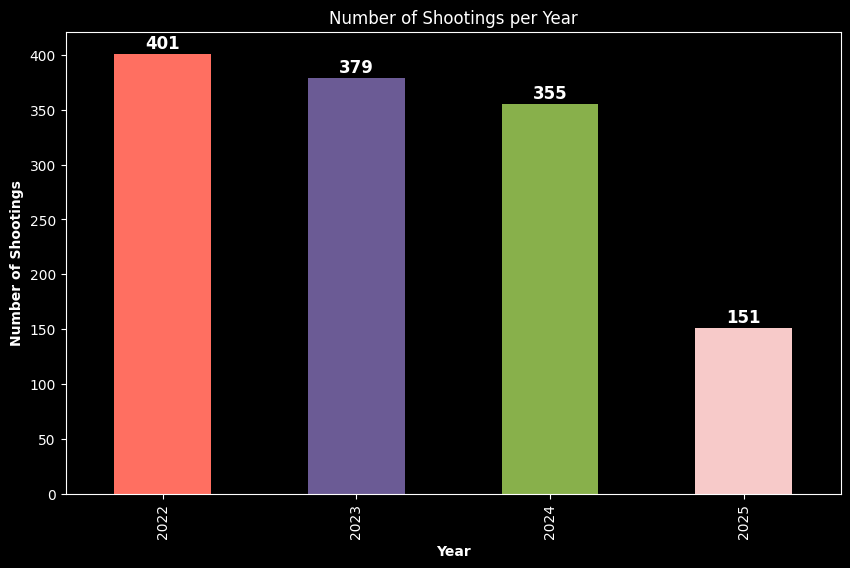

In [5]:
# Group by year and count the sum of shootings per year
shootings_per_year = df.groupby('YearOccurred').size()

plt.style.use('dark_background')
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9']

ax = shootings_per_year.plot(
    kind ='bar',
    figsize = (10,6),
    color = colors,
    title = 'Number of Shootings per Year'
)

# plot sum ontop of bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # x position: center of the bar
        p.get_height() + 5, # y position: a little above the bar
        int(p.get_height()), # text: the height value as int
        ha='center', # horizontal alignment
        color='white',
        fontsize=12,
        fontweight='bold'
    )
    
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.show()

Total shootings in 2022: 399


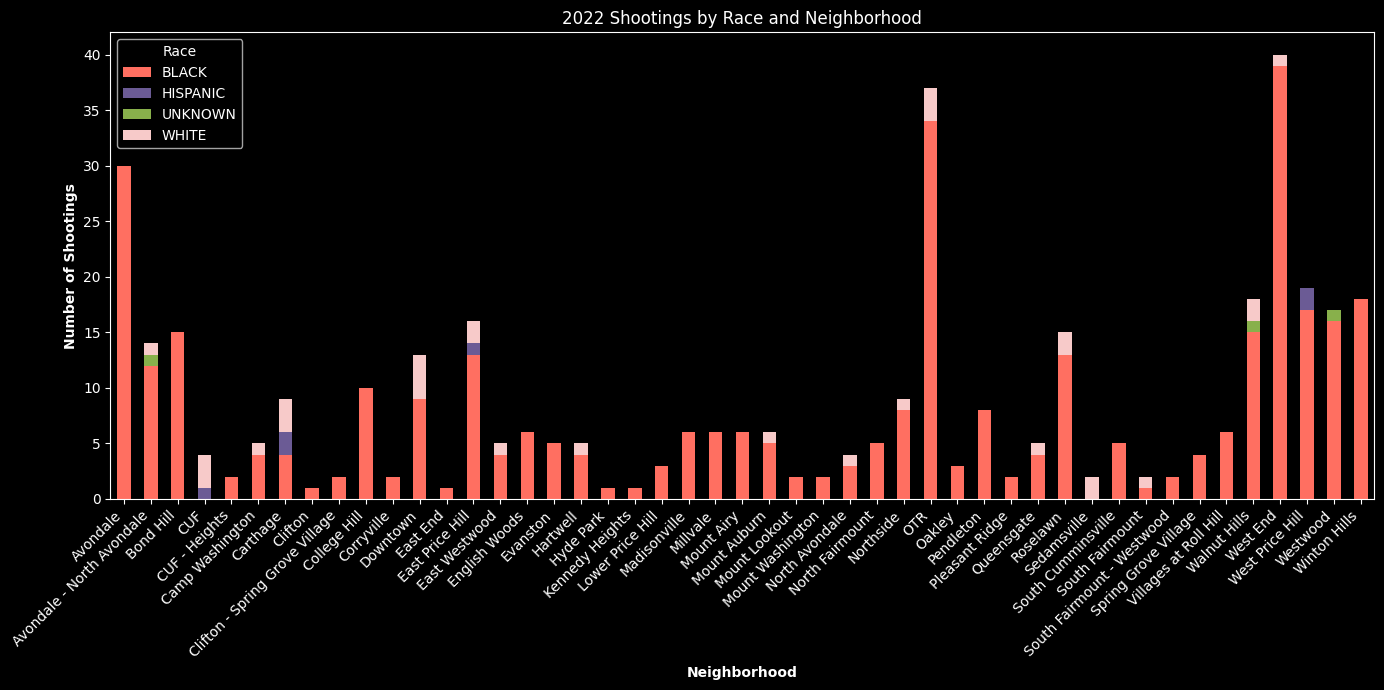

Shootings per 100,000 residents in Cincinnati in 2022: 128.26
Average shootings per day:  1.10


In [12]:
# looking at 2022 shootings
# filtering for 2022 only!
df_2022 = df_clean[df_clean['YearOccurred'] == 2022]
print(f"Total shootings in 2022: {len(df_2022)}")

# group by race and neighborhood
race_neighborhood_2022 = df_2022.groupby(['Race', 
                                          'COMMUNITY_COUNCIL_NEIGHBORHOOD']).size().unstack(fill_value=0)

# visualize
race_neighborhood_2022.T.plot(
    kind = 'bar',
    stacked=True,
    figsize=(14,7),
    color = colors,
    title = '2022 Shootings by Race and Neighborhood'
)

plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# total shootings in Cincinnati 2022 per 100,000 residents
total_shootings = df_2022.shape[0]
city_population = 311097

shootings_per_100k = (total_shootings / city_population) * 100000
print(f'Shootings per 100,000 residents in Cincinnati in 2022: {shootings_per_100k:.2f}')

# sum of shootings per day
total_shootings_per_year = 401
shootings_per_day = total_shootings_per_year / 365
print(f'Average shootings per day: {shootings_per_day: .2f}')

In [13]:
# show a text version of results
print("2022 Shootings by Race and Neighborhood:\n")
print(race_neighborhood_2022)

2022 Shootings by Race and Neighborhood:

COMMUNITY_COUNCIL_NEIGHBORHOOD  Avondale  Avondale - North Avondale  \
Race                                                                  
BLACK                                 30                         12   
HISPANIC                               0                          0   
UNKNOWN                                0                          1   
WHITE                                  0                          1   

COMMUNITY_COUNCIL_NEIGHBORHOOD  Bond Hill  CUF  CUF - Heights  \
Race                                                            
BLACK                                  15    0              2   
HISPANIC                                0    1              0   
UNKNOWN                                 0    0              0   
WHITE                                   0    3              0   

COMMUNITY_COUNCIL_NEIGHBORHOOD  Camp Washington  Carthage  Clifton  \
Race                                                                 


In [14]:
# Define age bins and labels
bins = [0, 17, 25, 32, 39, 46, 53, 60, 150]
labels = ['<18', '18-25', '26-32', '33-39', '40-46', '47-53', '54-60', '60+']

# Bin the Age column
df_2022 = df_2022.copy()
df_2022['AgeRange'] = pd.cut(df_2022['Age'], bins=bins, labels=labels, right=True)

# Group by AgeRange, Sex, Race, and Type
result = df_2022.groupby(['AgeRange', 'Sex', 'Race', 'Type'], observed=True).size().reset_index(name='Count')

# Show the grouped result
print(result)

   AgeRange     Sex      Race      Type  Count
0       <18  FEMALE     BLACK     FATAL      2
1       <18  FEMALE     BLACK  NONFATAL      5
2       <18  FEMALE     WHITE  NONFATAL      1
3       <18    MALE     BLACK     FATAL      4
4       <18    MALE     BLACK  NONFATAL     26
5       <18    MALE     WHITE  NONFATAL      1
6     18-25  FEMALE     BLACK  NONFATAL     14
7     18-25    MALE     BLACK     FATAL      8
8     18-25    MALE     BLACK  NONFATAL     89
9     18-25    MALE   UNKNOWN     FATAL      1
10    18-25    MALE     WHITE     FATAL      3
11    18-25    MALE     WHITE  NONFATAL      4
12    26-32  FEMALE     BLACK     FATAL      1
13    26-32  FEMALE     BLACK  NONFATAL     12
14    26-32    MALE     BLACK     FATAL     17
15    26-32    MALE     BLACK  NONFATAL     43
16    26-32    MALE  HISPANIC  NONFATAL      2
17    26-32    MALE     WHITE  NONFATAL      2
18    33-39  FEMALE     BLACK     FATAL      1
19    33-39  FEMALE     BLACK  NONFATAL     11
20    33-39  

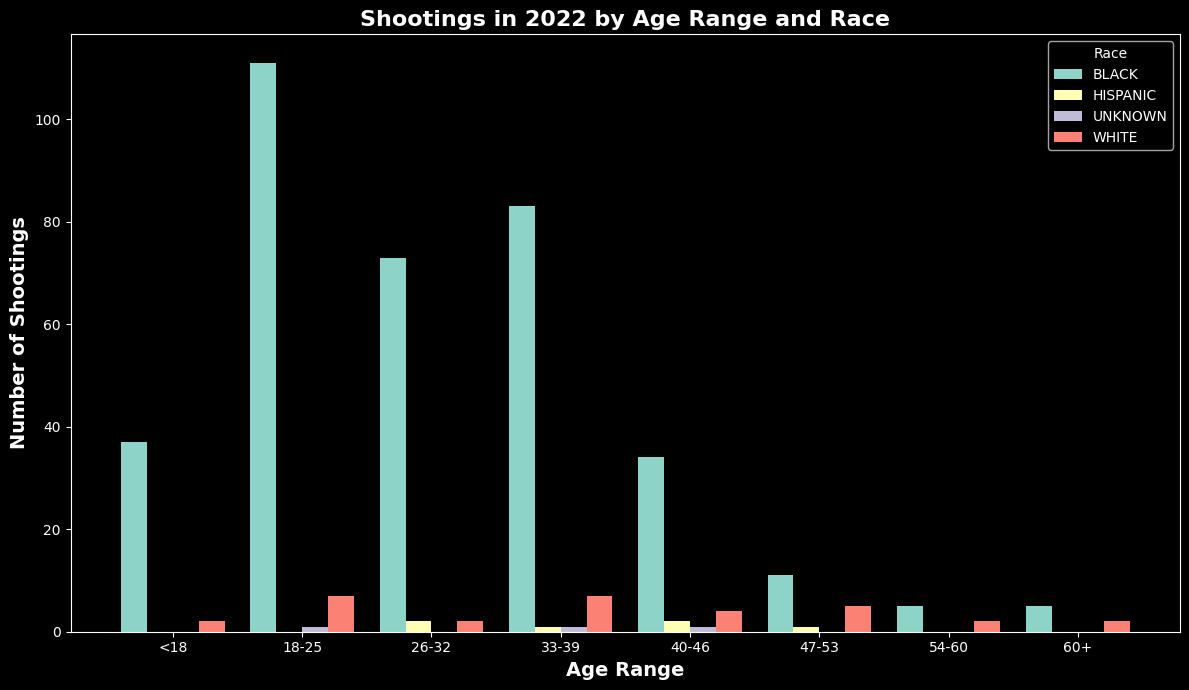

In [16]:
# Aggregate counts by AgeRange and Race only (sum over Sex and Type)
agg_result = result.groupby(['AgeRange', 'Race'], observed=True)['Count'].sum().reset_index()

# Now pivot safely
pivot_df = agg_result.pivot(index='AgeRange', columns='Race', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Number of bars per group and bar width
n_groups = len(pivot_df.index)
n_bars = len(pivot_df.columns)
bar_width = 0.8 / n_bars # total width split among bars

# Positions of groups on x-axis
indices = np.arange(n_groups)

# Plot each race's bars
for i, race in enumerate(pivot_df.columns):
    ax.bar(indices + i*bar_width, pivot_df[race], width=bar_width, label=race)

# Labels and title
ax.set_xlabel('Age Range', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Shootings', fontsize=14, fontweight='bold')
ax.set_title('Shootings in 2022 by Age Range and Race', fontsize=16, fontweight='bold')

# X-ticks in the middle of grouped bars
ax.set_xticks(indices + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(pivot_df.index)

# Legend
ax.legend(title='Race')

plt.tight_layout()
plt.show()

Type
NONFATAL    337
FATAL        62
Name: count, dtype: int64


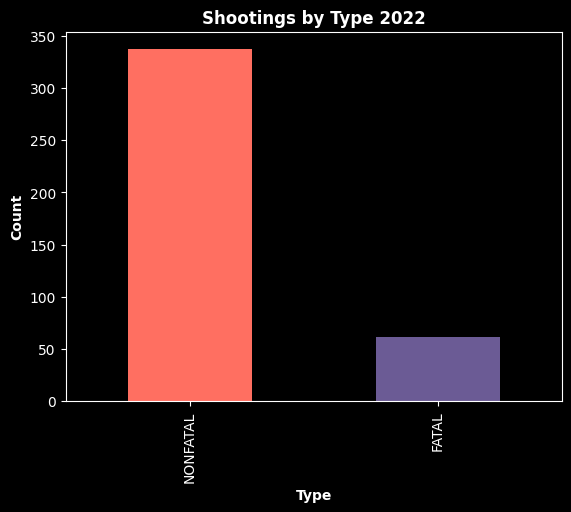

In [18]:
shooting_type_count = df_2022['Type'].value_counts()
print(shooting_type_count)
shooting_type_count.plot(kind='bar',
                         color=colors)
plt.title('Shootings by Type 2022', fontweight='bold')
plt.xlabel('Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

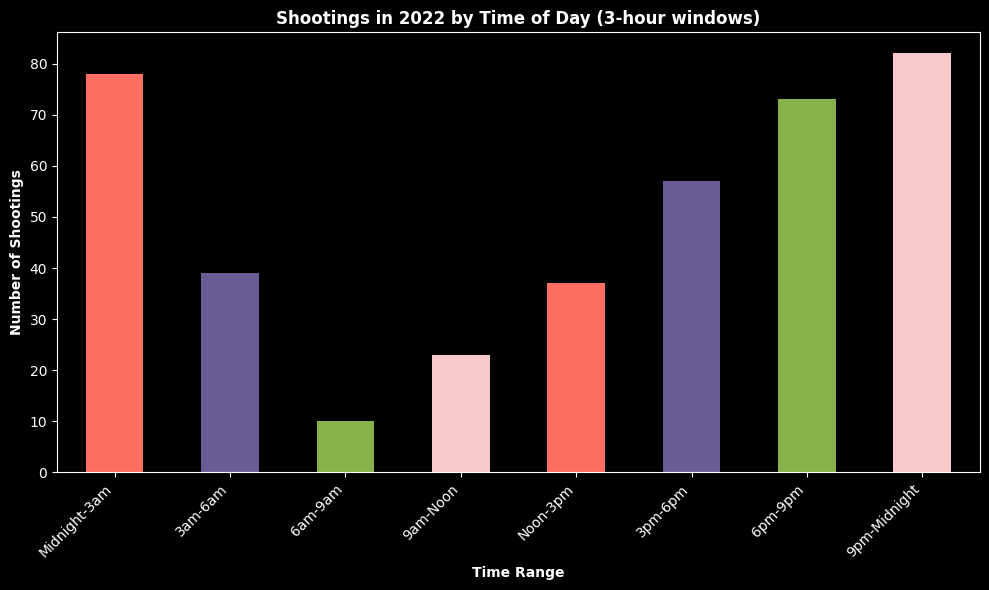

In [24]:
# Extract the hour properly from HHMMSS format
df_2022['Hour'] = (df_2022['TimeOccurred'] // 10000).astype(int)

# Define 3-hour bins and labels
bins = list(range(0, 25, 3))
labels = ['Midnight-3am', '3am-6am', '6am-9am', '9am-Noon', 
          'Noon-3pm', '3pm-6pm', '6pm-9pm', '9pm-Midnight']

# Bin the Hour into 3-hour time windows
df_2022['TimeBin'] = pd.cut(df_2022['Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count shootings per TimeBin
timebin_counts = df_2022.groupby('TimeBin', observed=True).size()

# Plot the shootings by 3-hour time bins
plt.figure(figsize=(10,6))
timebin_counts.plot(kind='bar', color=colors)
plt.title('Shootings in 2022 by Time of Day (3-hour windows)', fontweight='bold')
plt.xlabel('Time Range', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()